In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

titanic_df = pd.read_csv('/content/drive/MyDrive/AI VIETNAM/Module 5/data/titanic_modified_dataset.csv', index_col='PassengerId')
print(titanic_df.head())
print(f'Shape: {titanic_df.shape}')

             Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title  \
PassengerId                                                              
1                 3    0  22.0      1      0   7.2500         0      0   
2                 1    1  38.0      1      0  71.2833         1      1   
3                 3    1  26.0      0      0   7.9250         0      2   
4                 1    1  35.0      1      0  53.1000         0      1   
5                 3    0  35.0      0      0   8.0500         0      0   

             Survived  
PassengerId            
1                   0  
2                   1  
3                   1  
4                   1  
5                   0  
Shape: (891, 9)


In [128]:
dataset_arr = titanic_df.to_numpy().astype(np.float64)
print(dataset_arr[0, :])

X, y = dataset_arr[:, :-1], dataset_arr[:, -1]
print(X.shape, y.shape)

[ 3.    0.   22.    1.    0.    7.25  0.    0.    0.  ]
(891, 8) (891,)


In [129]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

print(X_b.shape)

(891, 9)


In [130]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y, test_size=val_size, random_state=random_state, shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle)

print(f'val_size: {round(X_val.shape[0] / X_b.shape[0], 1)}')
print(f'test_size: {round(X_test.shape[0] / X_b.shape[0], 1)}')

val_size: 0.2
test_size: 0.1


In [131]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [132]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [133]:
def predict(X, theta):
  dot_product = np.dot(X, theta)
  y_hat = sigmoid(dot_product)

  return y_hat

In [134]:
def compute_loss(y_hat, y):
  y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)

  return (-y * np.log(y_hat) - (1 - y) * np.log (1 - y_hat)).mean()

In [135]:
def compute_gradient(X, y, y_hat):
  return np.dot(X.T, (y_hat - y)) / y.size

In [136]:
def update_theta(theta, gradient, lr):
  return theta - lr * gradient

In [137]:
def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta).round()
  acc = (y_hat == y).mean()

  return acc

In [138]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(
    size=X_train.shape[1]
)

In [139]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i + batch_size]
        y_i = y_train[i:i + batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f"\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}")



EPOCH 1:	Training loss: 0.703	Validation loss: 0.590

EPOCH 2:	Training loss: 0.670	Validation loss: 0.574

EPOCH 3:	Training loss: 0.640	Validation loss: 0.560

EPOCH 4:	Training loss: 0.614	Validation loss: 0.549

EPOCH 5:	Training loss: 0.592	Validation loss: 0.539

EPOCH 6:	Training loss: 0.572	Validation loss: 0.531

EPOCH 7:	Training loss: 0.554	Validation loss: 0.524

EPOCH 8:	Training loss: 0.539	Validation loss: 0.519

EPOCH 9:	Training loss: 0.526	Validation loss: 0.514

EPOCH 10:	Training loss: 0.514	Validation loss: 0.511

EPOCH 11:	Training loss: 0.504	Validation loss: 0.508

EPOCH 12:	Training loss: 0.495	Validation loss: 0.506

EPOCH 13:	Training loss: 0.487	Validation loss: 0.504

EPOCH 14:	Training loss: 0.480	Validation loss: 0.503

EPOCH 15:	Training loss: 0.474	Validation loss: 0.502

EPOCH 16:	Training loss: 0.468	Validation loss: 0.501

EPOCH 17:	Training loss: 0.463	Validation loss: 0.500

EPOCH 18:	Training loss: 0.459	Validation loss: 0.500

EPOCH 19:	Training

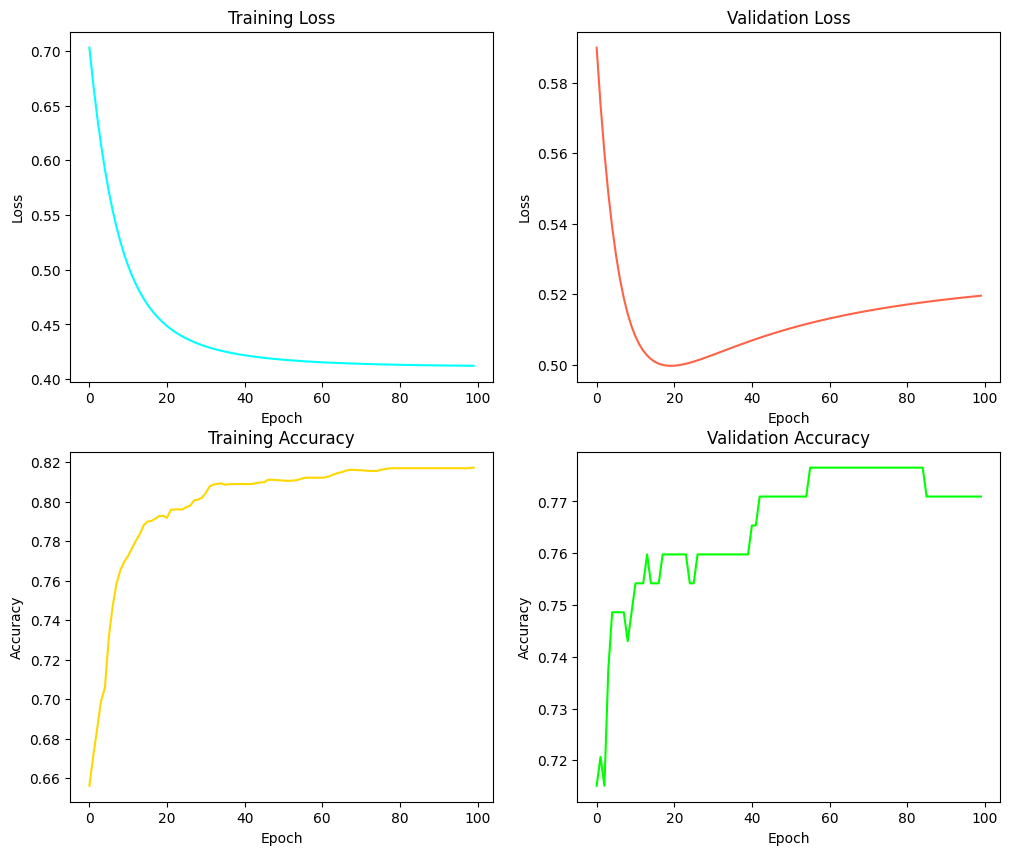

In [140]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Training Loss
ax[0, 0].plot(train_losses, color='aqua')
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

# Validation Loss
ax[0, 1].plot(val_losses, color='tomato')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

# Training Accuracy
ax[1, 0].plot(train_accs, color='gold')
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

# Validation Accuracy
ax[1, 1].plot(val_accs, color='lime')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()


In [141]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

print(f'Validation set accuracy: {val_set_acc:.3f}')
print(f'Test set accuracy: {test_set_acc:.3f}')

Validation set accuracy: 0.771
Test set accuracy: 0.775


In [142]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

sentiment_df = pd.read_csv('/content/drive/MyDrive/AI VIETNAM/Module 5/data/sentiment_analysis.csv', index_col='id')
print(sentiment_df.shape)
print(sentiment_df.head())

(7920, 2)
    label                                              tweet
id                                                          
1       0  #fingerprint #Pregnancy Test https://goo.gl/h1...
2       0  Finally a transparant silicon case ^^ Thanks t...
3       0  We love this! Would you go? #talk #makememorie...
4       0  I'm wired I know I'm George I was made that wa...
5       1  What amazing service! Apple won't even talk to...


In [143]:
import re
from nltk.tokenize import TweetTokenizer

def text_normalize(text):
    # Retweet old acronym "RT" removal
    text = re.sub(r'^RT[\s]+', '', text)

    # Hyperlinks removal
    text = re.sub(r'https?://[^\s\n]*', '', text)

    # Hashtags removal
    text = re.sub(r'#', '', text)

    # Punctuation removal
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokenizer = TweetTokenizer(
        preserve_case=False,
        strip_handles=True,
        reduce_len=True
    )
    text_tokens = tokenizer.tokenize(text)

    return text_tokens


In [144]:
def get_freqs(df):
    freqs = defaultdict(lambda: 0)

    for idx, row in df.iterrows():
        tweet = row['tweet']
        label = row['label']

        tokens = text_normalize(tweet)

        for token in tokens:
            pair = (token, label)
            freqs[pair] += 1

    return freqs

In [145]:
def get_feature(text, freqs):
  tokens = text_normalize(text)

  X = np.zeros(3)
  X[0] = 1

  for token in tokens:
    X[1] += freqs[(token, 0)]
    X[2] += freqs[(token, 1)]

  return X

In [146]:
X = []
y = []

freqs = get_freqs(sentiment_df)

for idx, row in sentiment_df.iterrows():
  tweet = row['tweet']
  label = row['label']

  X_i = get_feature(tweet, freqs)
  y_i = label

  X.append(X_i)
  y.append(y_i)

X = np.array(X)
y = np.array(y)

In [147]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=random_state, shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle)

print(f'val_size: {round(X_val.shape[0] / X.shape[0], 1)}')
print(f'test_size: {round(X_test.shape[0] / X.shape[0], 1)}')

val_size: 0.2
test_size: 0.1


In [148]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [149]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc


In [150]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(
    size=X_train.shape[1]
)

In [151]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i + batch_size]
        y_i = y_train[i:i + batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f"\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}")



EPOCH 1:	Training loss: 0.596	Validation loss: 0.506

EPOCH 2:	Training loss: 0.473	Validation loss: 0.446

EPOCH 3:	Training loss: 0.435	Validation loss: 0.422

EPOCH 4:	Training loss: 0.418	Validation loss: 0.409

EPOCH 5:	Training loss: 0.408	Validation loss: 0.401

EPOCH 6:	Training loss: 0.400	Validation loss: 0.394

EPOCH 7:	Training loss: 0.395	Validation loss: 0.390

EPOCH 8:	Training loss: 0.391	Validation loss: 0.386

EPOCH 9:	Training loss: 0.388	Validation loss: 0.383

EPOCH 10:	Training loss: 0.386	Validation loss: 0.381

EPOCH 11:	Training loss: 0.384	Validation loss: 0.379

EPOCH 12:	Training loss: 0.382	Validation loss: 0.378

EPOCH 13:	Training loss: 0.381	Validation loss: 0.376

EPOCH 14:	Training loss: 0.380	Validation loss: 0.375

EPOCH 15:	Training loss: 0.379	Validation loss: 0.374

EPOCH 16:	Training loss: 0.378	Validation loss: 0.374

EPOCH 17:	Training loss: 0.377	Validation loss: 0.373

EPOCH 18:	Training loss: 0.377	Validation loss: 0.372

EPOCH 19:	Training

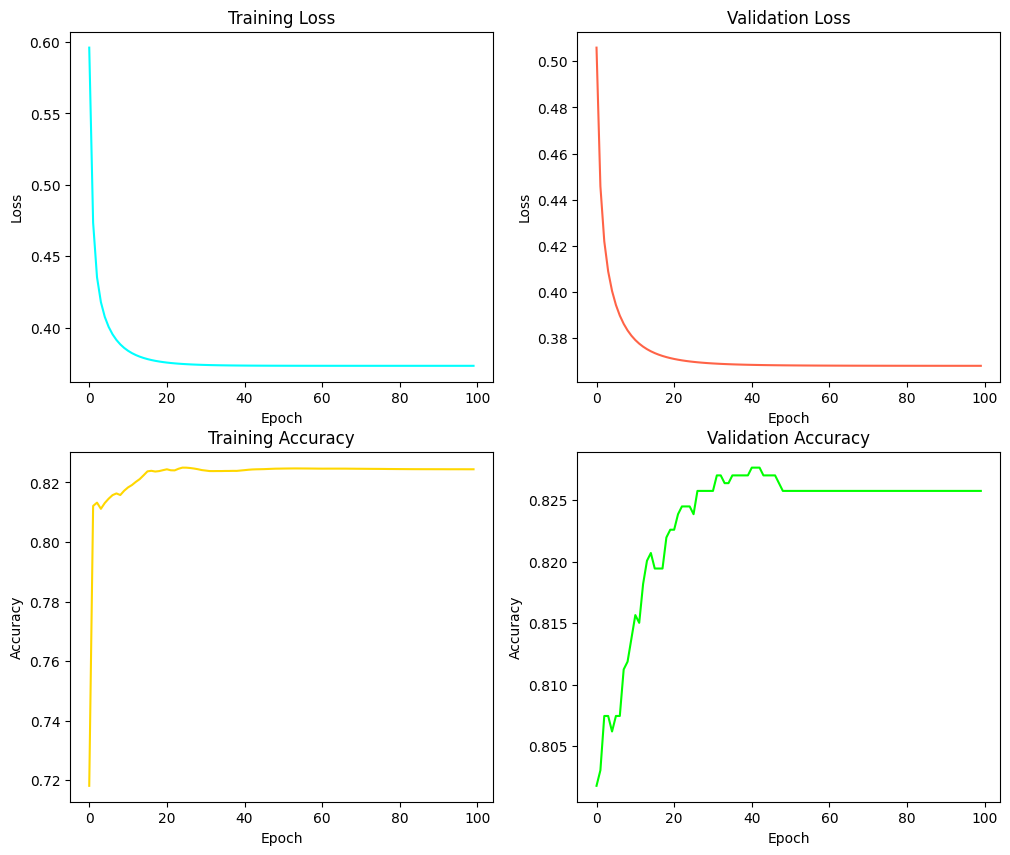

In [152]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Training Loss
ax[0, 0].plot(train_losses, color='aqua')
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

# Validation Loss
ax[0, 1].plot(val_losses, color='tomato')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

# Training Accuracy
ax[1, 0].plot(train_accs, color='gold')
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

# Validation Accuracy
ax[1, 1].plot(val_accs, color='lime')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()


In [153]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

print(f'Validation set accuracy: {val_set_acc:.3f}')
print(f'Test set accuracy: {test_set_acc:.3f}')

Validation set accuracy: 0.826
Test set accuracy: 0.840
